In [53]:
#Importing our libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score

**Importing our DataSet**

In [123]:
df = pd.read_excel('Final.xlsx')

In [124]:
df

,Unnamed: 0,CodeAssure_id,Nb_Sinistre_c,NombreSinistre,Duree,CodePolice_id,classeBonusMalusCompagnie,Fraude,ClasseBonusMalusCGA,DATE_AFFECTATION,...,usage,age_vehicule,nb_sinistres,ancienne_compagnie,satisfaction,dateEffetPolice,Etat_Police,naturePolice,typeIntermediaire,typePolice
0,0,24431,1,2,3,278575,2,1,11,2017-11-25 00:00:00.000000,...,Privé,13,1,Aucune,5,2014-11-25,V,R,1,I
1,1,24431,1,2,0,450805,1,1,11,2017-07-04 00:00:00.000000,...,Privé,13,1,Aucune,5,2017-07-04,V,R,3,I
2,2,24431,1,2,2,436783,4,1,11,2017-05-30 00:00:00.000000,...,Privé,13,1,Aucune,5,2015-05-30,V,R,3,I
3,3,24431,1,2,2,410781,3,1,11,2016-04-01 00:00:00.000000,...,Privé,13,1,Aucune,5,2014-04-01,V,R,3,I
4,4,24431,1,2,0,410936,1,1,11,2016-04-01 00:00:00.000000,...,Privé,13,1,Aucune,5,2016-04-01,V,R,3,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24542,24542,499098,0,0,4,613044,1,1,6,2017-11-14 00:00:00.000000,...,Privé,12,1,El amana takaful,2,2013-11-14,V,R,1,I
24543,24543,29471,0,0,0,36138,1,1,8,2016-04-01 00:00:00.000000,...,Privé,14,4,Ctama,3,2016-04-01,V,R,3,I
24544,24544,29485,0,0,0,36150,4,1,8,2016-04-16 00:00:00.000000,...,Professionnel,2,0,Biat-assurance,2,2016-04-16,R,R,1,I
24545,24545,30475,0,0,7,36479,1,1,5,2016-06-08 00:00:00.000000,...,Professionnel,20,2,Aucune,4,2009-06-08,R,R,1,I


**Dropping the columns that we won't need**

In [125]:
df.drop(['Unnamed: 0','DATE_AFFECTATION','gender', 'age',
       'gouvernorat', 'secteur_activite', 'compagnie_actuelle', 'usage',
       'age_vehicule', 'nb_sinistres', 'ancienne_compagnie', 'satisfaction','dateEffetPolice','date_permis','CodeAssure_id','CodePolice_id','_id'],axis=1,inplace=True)

In [126]:
x=df.drop(['Fraude'],axis=1)
y=pd.DataFrame(df['Fraude'])

In [127]:
x

,Nb_Sinistre_c,NombreSinistre,Duree,classeBonusMalusCompagnie,ClasseBonusMalusCGA,Etat_Police,naturePolice,typeIntermediaire,typePolice
0,1,2,3,2,11,V,R,1,I
1,1,2,0,1,11,V,R,3,I
2,1,2,2,4,11,V,R,3,I
3,1,2,2,3,11,V,R,3,I
4,1,2,0,1,11,V,R,3,I
...,...,...,...,...,...,...,...,...,...
24542,0,0,4,1,6,V,R,1,I
24543,0,0,0,1,8,V,R,3,I
24544,0,0,0,4,8,R,R,1,I
24545,0,0,7,1,5,R,R,1,I


**Filtering our Categorical features so we can perform the chi squared test**

In [128]:
mask = x.dtypes==object
categorical_cols =  x.columns[mask].tolist()

In [129]:
categorical_cols

['Etat_Police', 'naturePolice', 'typePolice']

**The Chi Squared function**

In [130]:
from scipy.stats import chi2
chi2_pvalues=[]
def chi2_pvalues_fun(feature_names):
    for feature in feature_names:
        dataset_table=pd.crosstab(df[feature],y['Fraude'])
        Observed_Values = dataset_table.values 
        val=stats.chi2_contingency(dataset_table)
        Expected_Values=val[3]
        chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
        chi_square_statistic=chi_square[0]+chi_square[1]
        p_value=1-chi2.cdf(x=chi_square_statistic,df=1)
        chi2_pvalues.append(p_value)

In [131]:
chi2_pvalues_fun(categorical_cols)

In [ ]:
chi2_pvalues_by_feature=pd.DataFrame({'feature_name':categorical_cols,'pvalue':chi2_pvalues})

**Our pvalues if it's over 0.05 it's not statistically significative**

In [133]:
chi2_pvalues_by_feature

,feature_name,pvalue
0,Etat_Police,0.000000
1,naturePolice,0.000041
2,typePolice,0.225132


In [134]:
df.drop(['typePolice'],axis=1,inplace=True)

In [137]:
mask = df.dtypes==object
categorical_cols =  df.columns[mask].tolist()
df_num=df.drop(categorical_cols,axis=1)

In [138]:
df_num

,Nb_Sinistre_c,NombreSinistre,Duree,classeBonusMalusCompagnie,Fraude,ClasseBonusMalusCGA,typeIntermediaire
0,1,2,3,2,1,11,1
1,1,2,0,1,1,11,3
2,1,2,2,4,1,11,3
3,1,2,2,3,1,11,3
4,1,2,0,1,1,11,3
...,...,...,...,...,...,...,...
24542,0,0,4,1,1,6,1
24543,0,0,0,1,1,8,3
24544,0,0,0,4,1,8,1
24545,0,0,7,1,1,5,1


**PCA For our numerical values**

In [139]:
from factor_analyzer import FactorAnalyzer

In [140]:
fa = FactorAnalyzer(n_factors=6,rotation="varimax")

In [141]:
fa.fit(df_num)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [142]:
loading=fa.loadings_
ev , v = fa.get_eigenvalues()
xvals=range(1,df_num.shape[1]+1)

**We can see in the plot that we only need 5 variables**

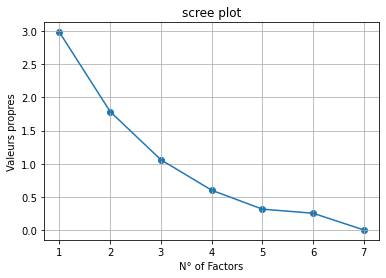

In [143]:
plt.scatter(xvals,ev)
plt.plot(xvals,ev)
plt.title('scree plot')
plt.xlabel('N° of Factors')
plt.ylabel('Valeurs propres')
plt.grid()
plt.show()

**Communalities – This is the proportion of each variable’s variance that can be explained by the factors**

In [144]:
pd.DataFrame({'feature_name':df_num.columns,'communalities':fa.get_communalities()})

,feature_name,communalities
0,Nb_Sinistre_c,0.997281
1,NombreSinistre,0.997332
2,Duree,0.758513
3,classeBonusMalusCompagnie,0.747353
4,Fraude,0.685529
5,ClasseBonusMalusCGA,0.906568
6,typeIntermediaire,0.403645


**The correlation between our PCA's generated features and our features**

In [145]:
#explain the correlations between observed variables using a smaller number of factors
pd.DataFrame(loading,df_num.columns)

,0,1,2,3,4,5
Nb_Sinistre_c,0.974496,0.186473,0.039295,0.105277,0.014841,0.004377
NombreSinistre,0.972669,0.189916,0.041708,0.111887,0.029972,0.004653
Duree,-0.081309,-0.845116,0.148527,0.067377,0.103729,-0.017917
classeBonusMalusCompagnie,0.007715,0.212720,-0.825702,0.031764,-0.031948,0.135022
Fraude,0.084004,0.049075,0.810354,0.075325,-0.017486,0.115804
ClasseBonusMalusCGA,0.409404,0.770657,0.023398,0.251889,0.284515,-0.010016
typeIntermediaire,0.459309,0.035996,0.052125,0.433980,0.017745,0.003838


In [146]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [147]:
df.columns

Index(['Nb_Sinistre_c', 'NombreSinistre', 'Duree', 'classeBonusMalusCompagnie',
       'Fraude', 'ClasseBonusMalusCGA', 'Etat_Police', 'naturePolice',
       'typeIntermediaire'],
      dtype='object')

In [148]:
# apply le on categorical feature columns
mask = df.dtypes==object
categorical_cols =  df.columns[mask].tolist()
X=df
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))
X[categorical_cols].head(10)

,Etat_Police,naturePolice
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0
5,2,0
6,0,0
7,0,0
8,0,0
9,0,0


**A logistic regression model to see causalities**

We can see that the model is statistically signicative and so we can interpret our coefficient
nb_sinistre_c, nbTotalSinistre,Bonus malus CGA, Etat Police and TypeIntermediaire have a positive coefficient
That means that each time they are greater, the probability that our insured is frauduleus is also greater

Encoded variables:


Etat Police : 'V' => 2, 'R' => 0, 'S' => 1


Nature Police : 'R' => 0 , 'T' => 1

In [149]:
import statsmodels.api as sm
x=df.drop(['Fraude'],axis=1)
y=df['Fraude']
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.072303
         Iterations 19
                              Results: Logit
Model:                  Logit               Pseudo R-squared:    0.750    
Dependent Variable:     Fraude              AIC:                 3565.6674
Date:                   2021-04-28 05:44    BIC:                 3630.5341
No. Observations:       24547               Log-Likelihood:      -1774.8  
Df Model:               7                   LL-Null:             -7089.8  
Df Residuals:           24539               LLR p-value:         0.0000   
Converged:              1.0000              Scale:               1.0000   
No. Iterations:         19.0000                                           
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
Nb_Sinistre_c              